<a href="https://colab.research.google.com/github/AkshaySingh-Github/Titanic-Survival-Prediction-Usin-ANN/blob/main/TitanicSurvival_ClassificationModel_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TitanicSurvival_ClassificationModel_using_ANN

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the dataset
TitanicSurvivalData=pd.read_csv('/content/drive/MyDrive/Data/TitanicSurvivalData.csv', encoding='latin')

In [3]:
TitanicSurvivalData.shape

(891, 12)

In [4]:
# Removing duplicate rows if any
TitanicSurvivalData=TitanicSurvivalData.drop_duplicates()

In [5]:
#Shape After deleting duplicate values
TitanicSurvivalData.shape

(891, 12)

In [6]:
# Printing sample data
TitanicSurvivalData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [7]:
# Looking at the descriptive statistics of the data
TitanicSurvivalData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Leyson, Mr. Robert William Norman",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Observing the summarized information of data
TitanicSurvivalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [9]:
# Finging unique values for each column
TitanicSurvivalData.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

## Removing useless columns from the data

In [10]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['PassengerId','Name','Ticket','Cabin']
TitanicSurvivalData = TitanicSurvivalData.drop(UselessColumns,axis=1)
TitanicSurvivalData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Looking at the distribution of Target variable

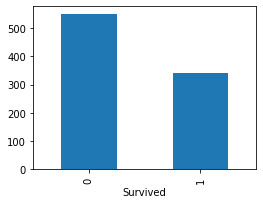

In [11]:
# Creating Bar chart as the Target variable is Categorical
TitanicSurvivalData.groupby('Survived').size().plot(kind='bar', figsize=(4,3))

#Visual Exploratory Data Analysis
###Categorical variables: Bar plot
###Continuous variables: Histogram

In [12]:
# Plotting multiple bar charts at once for categorical variables

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

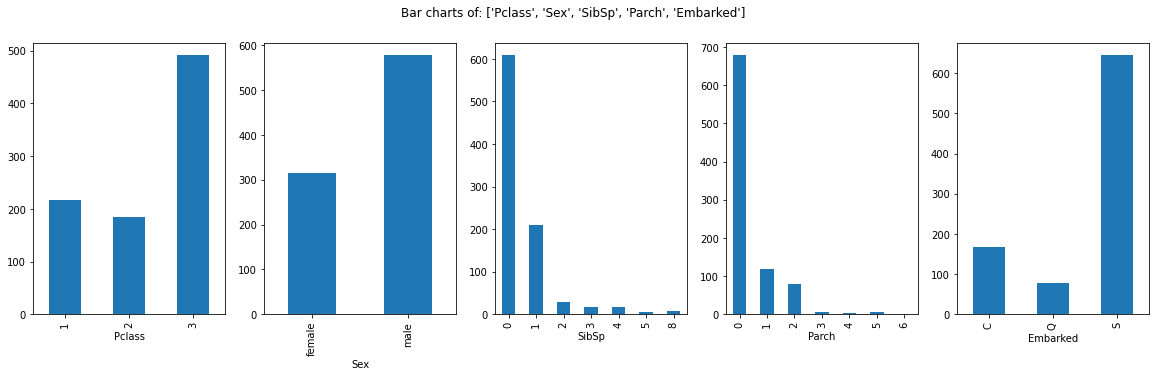

In [13]:
# Calling the function
PlotBarCharts(inpData=TitanicSurvivalData, colsToPlot=['Pclass', 'Sex', 'SibSp','Parch','Embarked'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5a97cc650>,
      dtype=object)

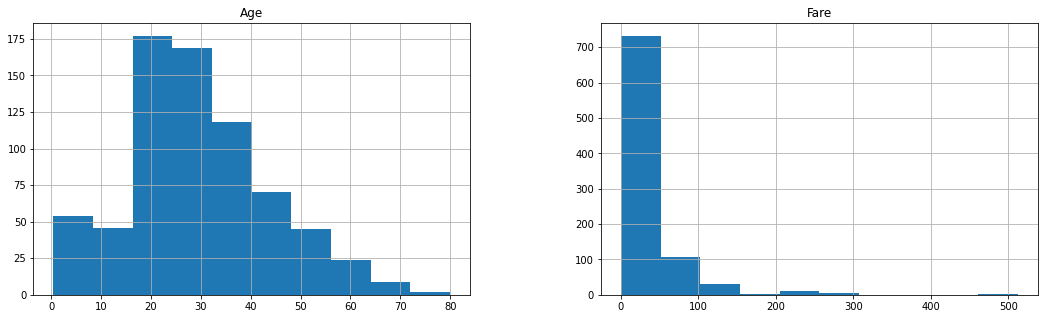

In [14]:
# Plotting histograms of multiple Continuous variables
# Observe that ApplicantIncome and CoapplicantIncome has outliers
TitanicSurvivalData.hist(['Age', 'Fare'], figsize=(18,5))

## Outlier treatment

In [15]:
# Finding nearest values to 300 mark
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']<300].sort_values(ascending=False)

341    263.000
438    263.000
27     263.000
88     263.000
311    262.375
        ...   
277      0.000
633      0.000
302      0.000
597      0.000
271      0.000
Name: Fare, Length: 888, dtype: float64

In [16]:
# Replacing outliers with nearest possibe value
TitanicSurvivalData['Fare'][TitanicSurvivalData['Fare']>300] = 263.0

### Visualizing distribution after outlier treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff5a850a3d0>]],
      dtype=object)

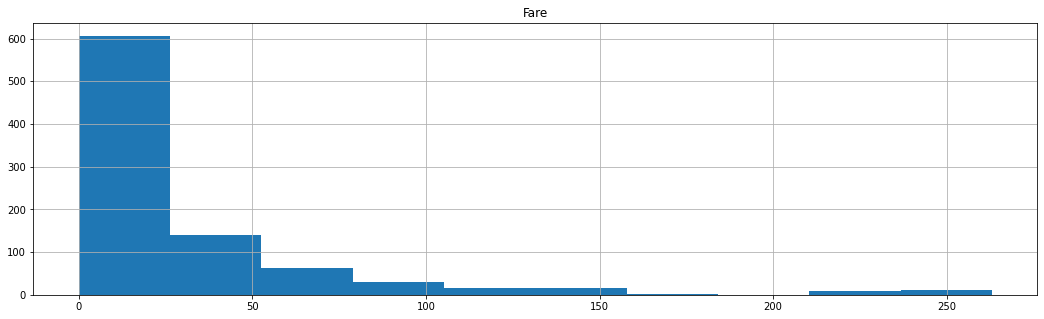

In [17]:
#Visualizing distribution after outlier treatment
TitanicSurvivalData.hist(['Fare'], figsize=(10,5))

### Missing values treatment

In [18]:
# Finding how many missing values are there for each column
TitanicSurvivalData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [19]:
# Replacing missing values of Age with median value
TitanicSurvivalData['Age'].fillna(TitanicSurvivalData['Age'].median(), inplace=True)


In [20]:
# Replacing missing values of Embarked with Mode value
TitanicSurvivalData['Embarked'].fillna(TitanicSurvivalData['Embarked'].mode()[0], inplace=True)

In [21]:
# Checking missing values again after the treatment
TitanicSurvivalData.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# Feature Selection

##Visual exploration of relationship between variables
###Categorical Vs Continuous---- Box Plot
###Categorical Vs Categorical---- Grouped Bar Plot

##Statistical measurement of relationship strength between variables
###Categorical Vs Continuous---- ANOVA test
###Categorical Vs Categorical--- Chi-Square test

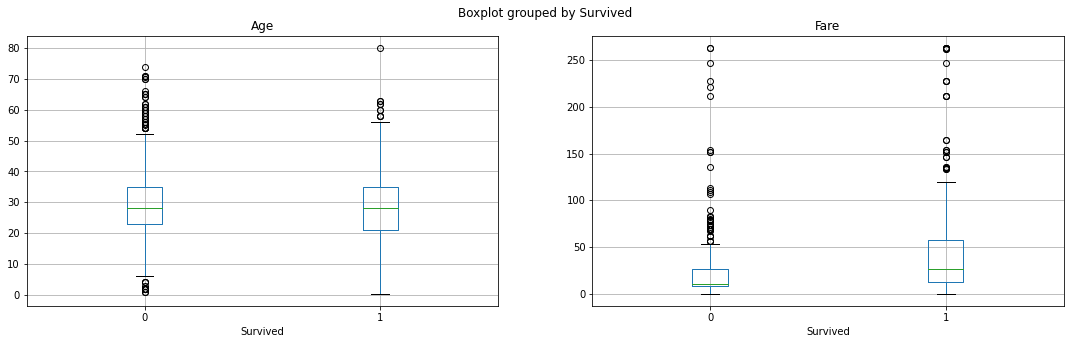

In [22]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Age','Fare']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    TitanicSurvivalData.boxplot(column=PredictorCol, by='Survived', figsize=(5,5), vert=True, ax=PlotCanvas[i])

In [23]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [24]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Age','Fare']
FunctionAnova(inpData=TitanicSurvivalData, TargetVariable='Survived', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Age is NOT correlated with Survived | P-Value: 0.052760688475835
Fare is correlated with Survived | P-Value: 1.8421954983111479e-16


['Fare']

In [25]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=TitanicSurvivalData['Sex'], columns=TitanicSurvivalData['Survived'])
CrossTabResult

Survived,0,1
Sex,,
female,81,233
male,468,109


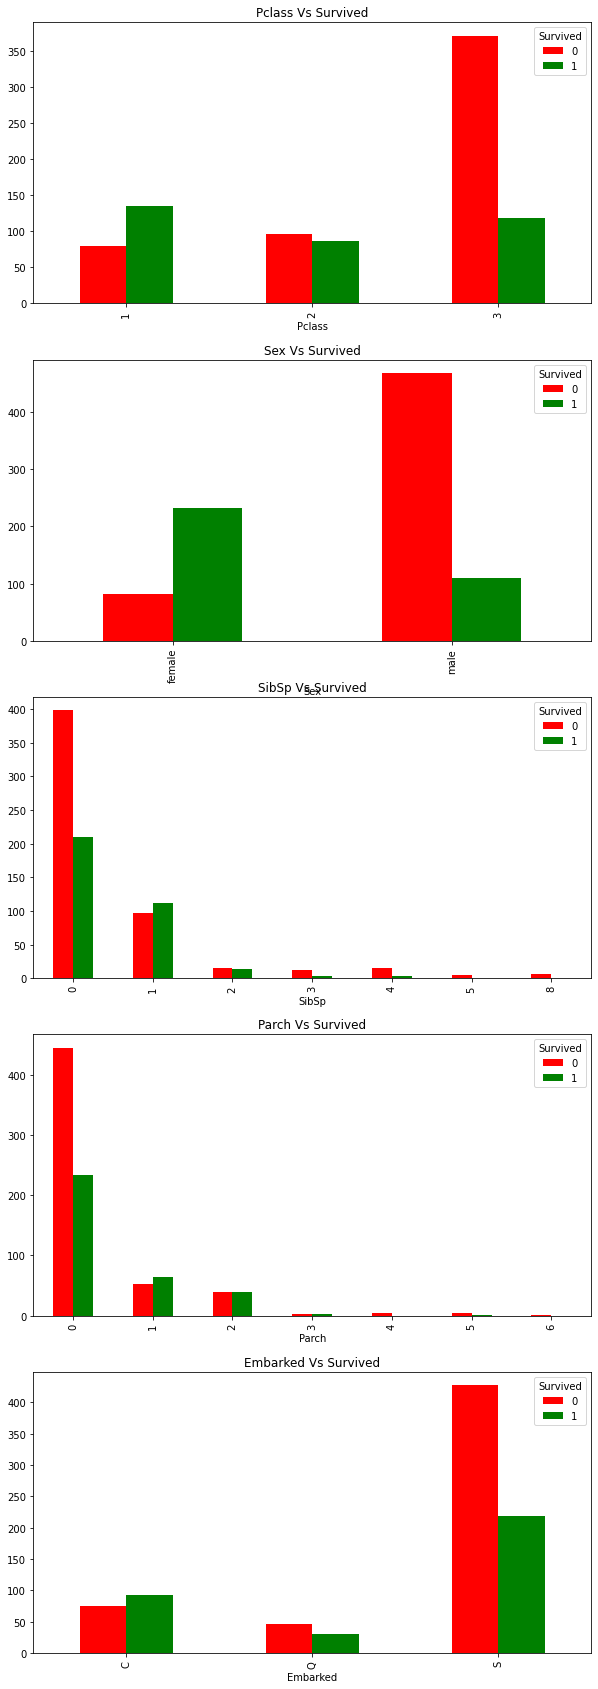

In [26]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Pclass', 'Sex', 'SibSp','Parch','Embarked']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,30))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=TitanicSurvivalData[CategoricalCol], columns=TitanicSurvivalData['Survived'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Survived')

In [27]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)



In [28]:
CategoricalVariables=['Pclass', 'Sex', 'SibSp','Parch','Embarked']
# Calling the function
FunctionChisq(inpData=TitanicSurvivalData, 
              TargetVariable='Survived',
              CategoricalVariablesList= CategoricalVariables)

Pclass is correlated with Survived | P-Value: 4.549251711298793e-23
Sex is correlated with Survived | P-Value: 1.1973570627755645e-58
SibSp is correlated with Survived | P-Value: 1.5585810465902116e-06
Parch is correlated with Survived | P-Value: 9.703526421039997e-05
Embarked is correlated with Survived | P-Value: 2.3008626481449577e-06


['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

## Selecting final predictors for Machine Learning

In [29]:
SelectedColumns=['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked','Fare']

# Selecting final columns
DataForML=TitanicSurvivalData[SelectedColumns]
DataForML.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare
0,3,male,1,0,S,7.2500
1,1,female,1,0,C,71.2833
2,3,female,0,0,S,7.9250
3,1,female,1,0,S,53.1000
4,3,male,0,0,S,8.0500


In [30]:
# Saving this final data for reference during deployment
DataForML.to_pickle('TitanicDataForML.pkl')

# Converting the binary nominal variable to numeric using 1/0 mapping

In [31]:
# Converting the binary nominal variable sex to numeric
DataForML['Sex'].replace({'female':0, 'male':1}, inplace=True)

# Converting the nominal variable to numeric using get_dummies()

In [32]:
# Treating all the nominal variables at once using dummy variables
TitanicSurvivalDataNumeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
TitanicSurvivalDataNumeric['Survived']=TitanicSurvivalData['Survived']

# Printing sample rows
TitanicSurvivalDataNumeric.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,1,1,0,7.2500,0,0,1,0
1,1,0,1,0,71.2833,1,0,0,1
2,3,0,0,0,7.9250,0,0,1,1
3,1,0,1,0,53.1000,0,0,1,1
4,3,1,0,0,8.0500,0,0,1,0


# Splitting the Data into Training and Testing

In [33]:
# After Standardization of data
# Separate Target Variable and Predictor Variables
TargetVariable=['Survived']
Predictors=['Pclass', 'Sex',  'SibSp', 'Parch', 'Fare','Embarked_C', 'Embarked_Q', 'Embarked_S']

X=TitanicSurvivalDataNumeric[Predictors].values
y=TitanicSurvivalDataNumeric[TargetVariable].values


### Sandardization of data ###
### We does not standardize the Target variable for classification
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(623, 8)
(623, 1)
(268, 8)
(268, 1)


## Creating Classification Model using Deep Learning- Artificial Neural Networks(ANN)

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=10 , epochs=10, verbose=1)

Epoch 1/10
63/63 [==============================] - 13s 1ms/step - loss: 0.6917 - accuracy: 0.5837
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6839 - accuracy: 0.6245
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6610 - accuracy: 0.7342
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.6115 - accuracy: 0.7904
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.8053
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.7889
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4850 - accuracy: 0.8003
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8064
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4646 - accuracy: 0.8111
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4327 - accuracy: 0.8287


# Finding the best ANN hyperparameters using GridSearchCV

In [38]:
# Function to generate Deep ANN model 
def make_classification_ann(Optimizer_Trial, Neurons_Trial,activation_function):
    from keras.models import Sequential
    from keras.layers import Dense
    
    # Creating the classifier ANN model
    classifier = Sequential()
    classifier.add(Dense(units=Neurons_Trial, input_dim=8, kernel_initializer='uniform', activation= activation_function))
    classifier.add(Dense(units=Neurons_Trial, kernel_initializer='uniform', activation= activation_function))
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    classifier.compile(optimizer=Optimizer_Trial, loss='binary_crossentropy', metrics=['accuracy'])
            
    return classifier

In [39]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier


Parameter_Trials={'batch_size':[10,20,30],'epochs':[10,20],'Optimizer_Trial':['adam', 'rmsprop'],
                  'Neurons_Trial': [5,10],'activation_function': ['relu','sigmoid','tanh']}


classifierModel=KerasClassifier(make_classification_ann, verbose=0)

In [40]:
# Creating the Grid search space
# See different scoring methods by using sklearn.metrics.SCORERS.keys()
grid_search=GridSearchCV(estimator=classifierModel, param_grid=Parameter_Trials, scoring='f1', cv=5)

In [41]:
# Measuring how much time it took to find the best params
import time
StartTime=time.time()

# Running Grid Search for different paramenters
grid_search.fit(X_train,y_train, verbose=1)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Streaming output truncated to the last 5000 lines.
25/25 [==============================] - 1s 3ms/step - loss: 0.6922 - accuracy: 0.6311
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5943
Epoch 3/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6784 - accuracy: 0.6332
Epoch 4/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6207
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6406
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5688 - accuracy: 0.6821
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5729 - accuracy: 0.7179
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5348 - accuracy: 0.7773
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5327 - accuracy: 0.7804
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.488

In [42]:
grid_search.best_params_

{'Neurons_Trial': 10,
 'Optimizer_Trial': 'adam',
 'activation_function': 'relu',
 'batch_size': 20,
 'epochs': 20}

In [43]:
grid_search.best_score_

0.7163700015913068

# ANN Model with Final Hyperparameter

In [45]:
classifier = Sequential()
# Defining the Input layer and FIRST hidden layer
# relu means Rectifier linear unit function
classifier.add(Dense(units=10, input_dim=8, kernel_initializer='uniform', activation='relu'))

#Defining the SECOND hidden layer, here we have not defined input because it is
# second layer and it will get input as the output of first hidden layer
classifier.add(Dense(units=10, kernel_initializer='uniform', activation='relu'))

# Defining the Output layer
# sigmoid means sigmoid activation function
# for Multiclass classification the activation ='softmax'
# And output_dim will be equal to the number of factor levels
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Optimizer== the algorithm of SGG to keep updating weights
# loss== the loss function to measure the accuracy
# metrics== the way we will compare the accuracy after each step of SGD
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [46]:
# fitting the Neural Network on the training data
survivalANN_Model=classifier.fit(X_train,y_train, batch_size=20 , epochs=20, verbose=1)

Epoch 1/20
32/32 [==============================] - 1s 1ms/step - loss: 0.6920 - accuracy: 0.6174
Epoch 2/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.6131
Epoch 3/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6703
Epoch 4/20
32/32 [==============================] - 0s 1ms/step - loss: 0.6347 - accuracy: 0.7616
Epoch 5/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5865 - accuracy: 0.7874
Epoch 6/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5167 - accuracy: 0.8296
Epoch 7/20
32/32 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7815
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.4756 - accuracy: 0.7990
Epoch 9/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4705 - accuracy: 0.8041
Epoch 10/20
32/32 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8234
Epoch 11/20
32/32 [

## Checking model accuracy on Testing Data

In [47]:
# Predictions on testing data
Predictions=classifier.predict(X_test)
 
# Scaling the test data back to original scale
Test_Data=PredictorScalerFit.inverse_transform(X_test)
 
# Generating a data frame for analyzing the test data
TestingData=pd.DataFrame(data=Test_Data, columns=Predictors)
TestingData['Survival']=y_test
TestingData['PredictedSurvivalProb']=Predictions
 
# Defining the probability threshold
def probThreshold(inpProb):
    if inpProb > 0.5:
        return(1)
    else:
        return(0)
 
# Generating predictions on the testing data by applying probability threshold
TestingData['PredictedSurvival']=TestingData['PredictedSurvivalProb'].apply(probThreshold)
print(TestingData.head())
 
###############################################
from sklearn import metrics
print('\n######### Testing Accuracy Results #########')
print(metrics.classification_report(TestingData['Survival'], TestingData['PredictedSurvival']))
print(metrics.confusion_matrix(TestingData['Survival'], TestingData['PredictedSurvival']))

   Pclass  Sex  SibSp  ...  Survival  PredictedSurvivalProb  PredictedSurvival
0     3.0  1.0    1.0  ...         1               0.271106                  0
1     2.0  1.0    0.0  ...         0               0.155179                  0
2     3.0  1.0    0.0  ...         0               0.107371                  0
3     2.0  0.0    0.0  ...         1               0.891804                  1
4     3.0  0.0    1.0  ...         1               0.684405                  1

[5 rows x 11 columns]

######### Testing Accuracy Results #########
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.77      0.69      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268

[[134  23]
 [ 34  77]]
